# Overview
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Problem Definition
A machine learning and deep learning model to help detect if a person have stroke or not. Machine Learning Algorithms and deep learning techniques using `Tensorflow` and `Pytourch` will be used in building and performing different experiments.


# Evaluation
If we are able to get an accuracy score between 60 to 95 and a lower loss value between 0.00 to 0.05 then our model is ready to move into production.

# Algorithms to use
* GradientBoostingClassifier
* LinearDiscriminantAnalysis
* Random Forest Classifier.
* Support Vector Machine.
* ExtraTreesClassifier
* Logistic Regression.
* k-Nearest Neighbors.
* AdaBoostClassifier
* MLPClassifier
* Decision Tree.
* Naive Bayes.
* Deep Learning Techniques
    * Tensorflow
    * Pytourch

# Features
* 1) id: unique identifier
* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not
> Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Dataset
The dataset can be located at kaggle or UCI. You can click on the link bellow to get the dataset from kaggle repository. [Dataset From Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

# Deployment
After the model has successfully been developed. We will deploy the app both on Google Cloud and Microsoft Azure.

### Azure
    * Container App
    * Storage Account
    * Resource Group
    * Managed Identity

### Others
    * Docker
    * Terraform
    * FastAPI

In [4]:
#Import core tools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Import preprocessing libries from scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Import scalling libries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Import Algorithms from scikitlearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Import Evaluation matrics to evaluate our models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Hyper-parameter tuning scikitlearn libries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Import tensorflow libries
import tensorflow as tf

#Import others
import warnings
import zipfile
import pickle
import os

#Ignore warnings
warnings.filterwarnings("ignore")

In [5]:
#Okay so now lets create a python object with our algorithms in them
# We will use loop to iterate over this algorithms and build our model on it.
#Okay so now lets create a python object with our algorithms in them
# We will use loop to iterate over this algorithms and build our model on it.
algorithms  = {
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "GaussianNB": GaussianNB(),
    "SVC": SVC()
}

In [6]:
#Okay so now lets display our algorithms
algorithms

{'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'DecisionTreeClassifier': DecisionTreeClassifier(),
 'RandomForestClassifier': RandomForestClassifier(),
 'KNeighborsClassifier': KNeighborsClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'LogisticRegression': LogisticRegression(),
 'MLPClassifier': MLPClassifier(),
 'GaussianNB': GaussianNB(),
 'SVC': SVC()}

Okay so now that we have successfully defined what we will be doing, we are now going to start exploring our dataset. We will perform `Exploratory Data Analysis (EDA)` on our train dataset. By doing so we will get to know more about our datasets before we start preprocessing it and finally build a good working model our of it. 

But before we do that, lets first try to get our dataset from azure machine learning studio datastore. Okay so without wasting much time, lets get started now.

In [7]:
# Get dataset from googles cloud storage backeg

try:
    
    # Read in dataset
    df = pd.read_csv("./dataset/stroke.csv")

except:
    
    # Download dataset from cloud storage bucket
    !wget https://storage.googleapis.com/machinelearingsturage/stroke.zip

    # Make a new directory and copy dataset into
    !mkdir dataset
    !mv stroke.zip ./dataset/

    # Zip stroke.zip file
    data = zipfile.ZipFile("./dataset/stroke.zip")
    
    # Extract dataset
    data.extractall("./dataset/")
    
    # Close connection
    data.close()
    
    # Read dataset
    df = pd.read_csv("./dataset/stroke.csv")


In [8]:
#Display dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
#Check the shape of ur dataset
df.shape

(5110, 12)

In [10]:
#Check the total number of values in each class
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

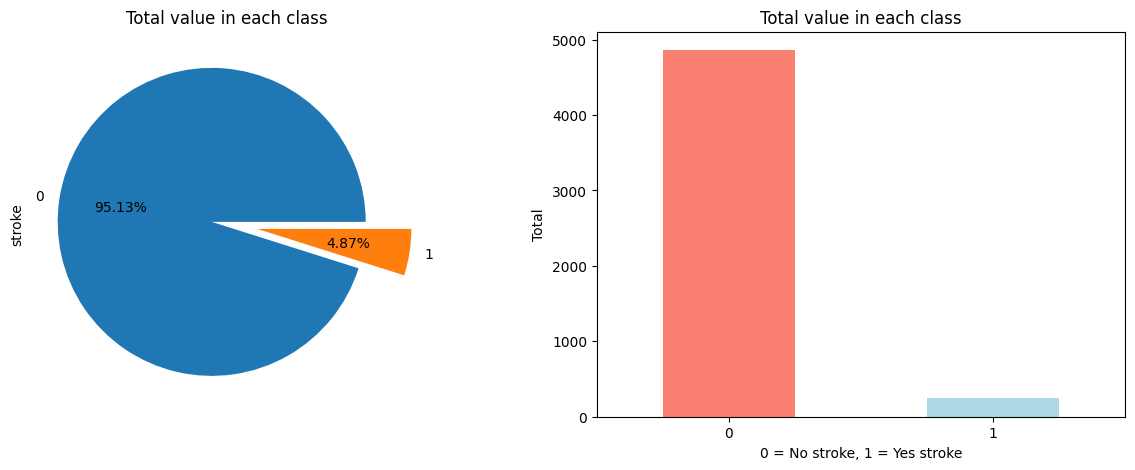

In [11]:
# Configure view size
plt.figure(figsize=(15, 5))

#Lets visualize total number of data in each class
plt.subplot(1, 2, 1)
df.stroke.value_counts().plot(kind="pie", autopct="%.2f%%", explode=[0.1, 0.2]);
plt.title("Total value in each class");

plt.subplot(1, 2, 2)
df.stroke.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xlabel("0 = No stroke, 1 = Yes stroke");
plt.title("Total value in each class");
plt.xticks(rotation=0);
plt.ylabel("Total");

Okay so from above, we can see that our dataset is not balanced. As we already know that inother for us to build a better machine learning model, the total number of sample in each class has to be balanced henced we are going to balance the dataset before performing `Exploratory Data Analysis` on it. Okay so without wasting much time now, let's get started now.

In [12]:
#Display dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
#Get stroke and no stroke dataset
yes_stroke = df[df["stroke"] == 1]
no_stroke = df[df["stroke"] == 0]

In [14]:
#Check no stroke shape
no_stroke.shape

(4861, 12)

In [15]:
#Check stroke dataset
yes_stroke.shape

(249, 12)

In [16]:
#Set random seed
np.random.seed(42)

#Get the balanced data of patient not having stroke
new_no_stroke = no_stroke.sample(yes_stroke.shape[0])

#Display new_no_stroke_datase
print(f"No stroke dataset: {new_no_stroke.shape}")
print(f"Yes stroke dataset: {yes_stroke.shape}")

No stroke dataset: (249, 12)
Yes stroke dataset: (249, 12)


Okay so we have successfully balanced our dataset. Now, we are going to merge both new_no_stroke and yes_stroke into one dataset inother for us to start exploraing our dataset. Okay so lets get started now.

In [17]:
#Merge dataset now
new_df = pd.concat([new_no_stroke, yes_stroke], axis=0, ignore_index=True)

#Display dataset
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2244,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
1,26076,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2,31019,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
3,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4,68330,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0


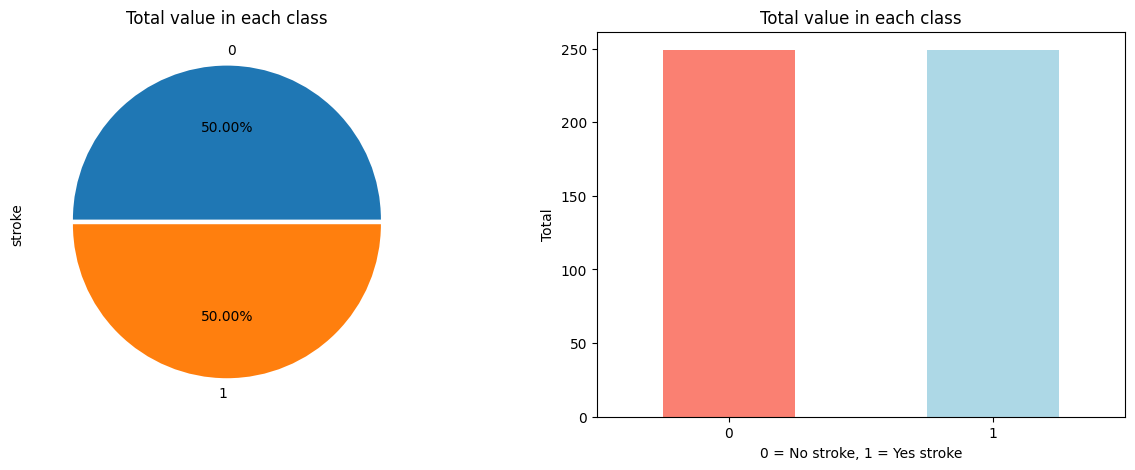

In [18]:
# Configure view size
plt.figure(figsize=(15, 5))

#Lets visualize total number of data in each class
plt.subplot(1, 2, 1)
new_df.stroke.value_counts().plot(kind="pie", autopct="%.2f%%", explode=[0.03, 0.0]);
plt.title("Total value in each class");

plt.subplot(1, 2, 2)
new_df.stroke.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xlabel("0 = No stroke, 1 = Yes stroke");
plt.title("Total value in each class");
plt.xticks(rotation=0);
plt.ylabel("Total");

Okay so now we have successfully balanced our dataset. Now, we are going to start exploring our dataset like we discussed earlier on inother for us to know more about it. Okay so lets get started without wasting much time.

In [19]:
#Check for null values in our dataset
new_df.isna().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  50
smoking_status        0
stroke                0
dtype: int64

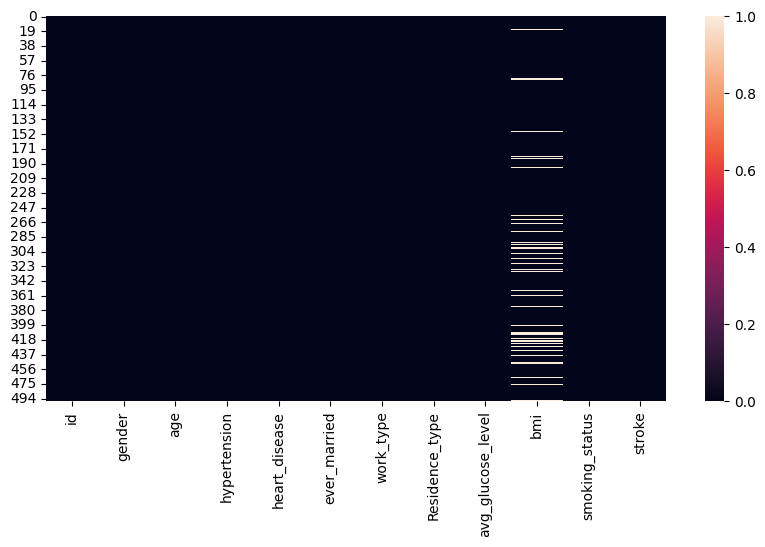

In [20]:
#Visualize null values in our dataset
plt.figure(figsize=(10,5));
sns.heatmap(new_df.isnull());

In [21]:
#Check dataset data types
new_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [22]:
# Describe dataset
new_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,498.000000,498.000000,498.000000,498.000000,498.000000,448.000000,498.000000
mean,36920.014056,55.544498,0.180723,0.120482,119.334418,29.499107,0.500000
std,21572.751089,21.342856,0.385175,0.325852,55.730541,7.445035,0.500503
min,210.000000,0.240000,0.000000,0.000000,55.930000,14.300000,0.000000
25%,16839.250000,43.000000,0.000000,0.000000,77.122500,24.400000,0.000000
50%,37779.000000,59.000000,0.000000,0.000000,97.955000,28.500000,0.500000
75%,55589.750000,74.000000,0.000000,0.000000,152.442500,33.200000,1.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


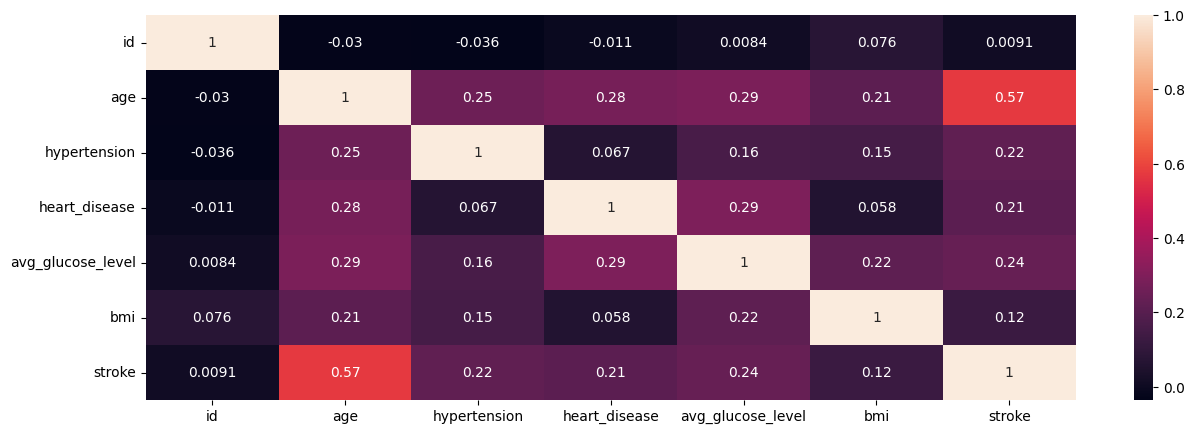

In [23]:
#Display all information on dataset
plt.figure(figsize=(15, 5))
sns.heatmap(new_df.corr(), annot=True);

Okay so we can see that bmi contains null values. It is the only feature which contains null value in our dataset. Also, the above graph displays the relationship between the features in our dataset. Okay so lets continue to explore our dataset by comparing them to each other.

In [24]:
#Display datasets
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2244,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
1,26076,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2,31019,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
3,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4,68330,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0


## Comparing Gender with stroke
Okay so we with the gender feature, we are going to check amoung fame and female those who had more stroke.

In [25]:
#Check total number of male and female
new_df.gender.value_counts()

Female    285
Male      213
Name: gender, dtype: int64

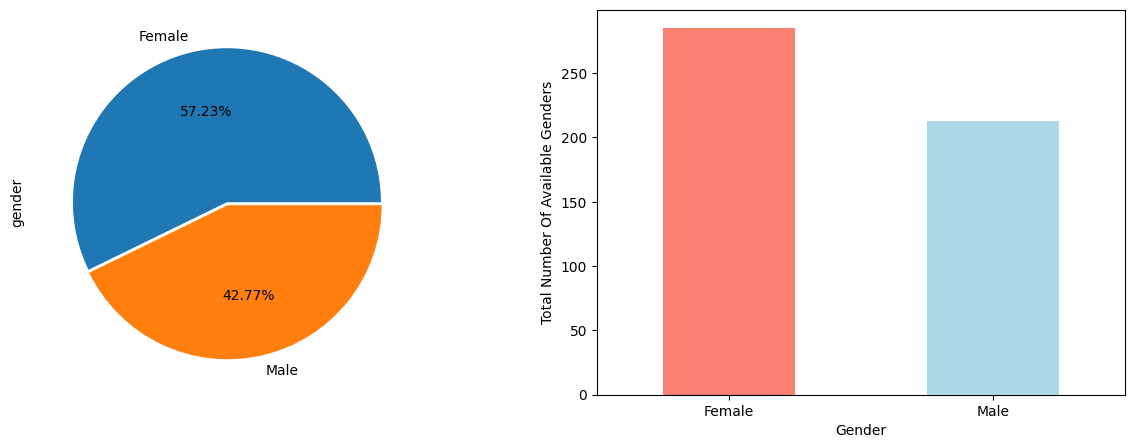

In [26]:
#Lets visualize our results using bar and pie chart
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1);
new_df.gender.value_counts().plot(kind="pie", explode=[0.0, 0.02], autopct="%.2f%%");

# Bar chart
plt.subplot(1, 2, 2)
new_df.gender.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.ylabel("Total Number Of Available Genders");
plt.xticks(rotation=0)
plt.xlabel("Gender");


In [27]:
#Okay so now lets try to see those who had more stroke
pd.crosstab(new_df.gender, new_df.stroke);

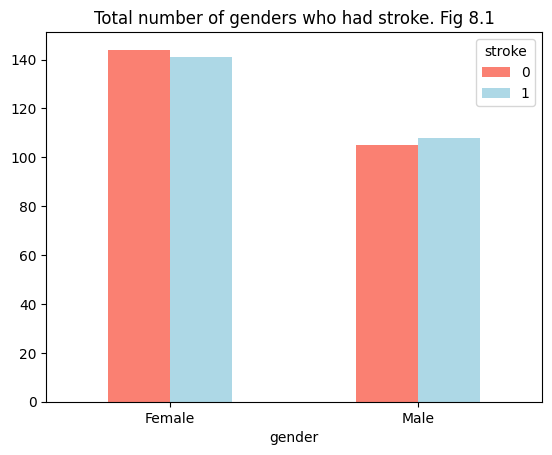

In [28]:
#Lets visualize above results to get more insight
pd.crosstab(new_df.gender, new_df.stroke).plot(kind="bar", color=["salmon", "lightblue"]);
plt.xticks(rotation=0);
plt.title("Total number of genders who had stroke. Fig 8.1");

Okay so from above graph, we can see that the total number of females who had stroke and less than the total number of Females who did not have stroke. Again the total number of Males who had stroke are also more than the total number of Males who did not have stroke.

In all, the total number of those who had more stroke were Female. Okay so now lets continue again to compare other features with our target feature.

## Comparing Work type with stroke

In [29]:
#Display dataset again
new_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
493,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
494,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
495,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
496,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1
497,43424,Female,78.0,0,0,Yes,Private,Rural,78.81,19.6,Unknown,1


In [30]:
#Check the total number of value counts in age
new_df.work_type.value_counts()

Private          294
Self-employed    103
Govt_job          68
children          32
Never_worked       1
Name: work_type, dtype: int64

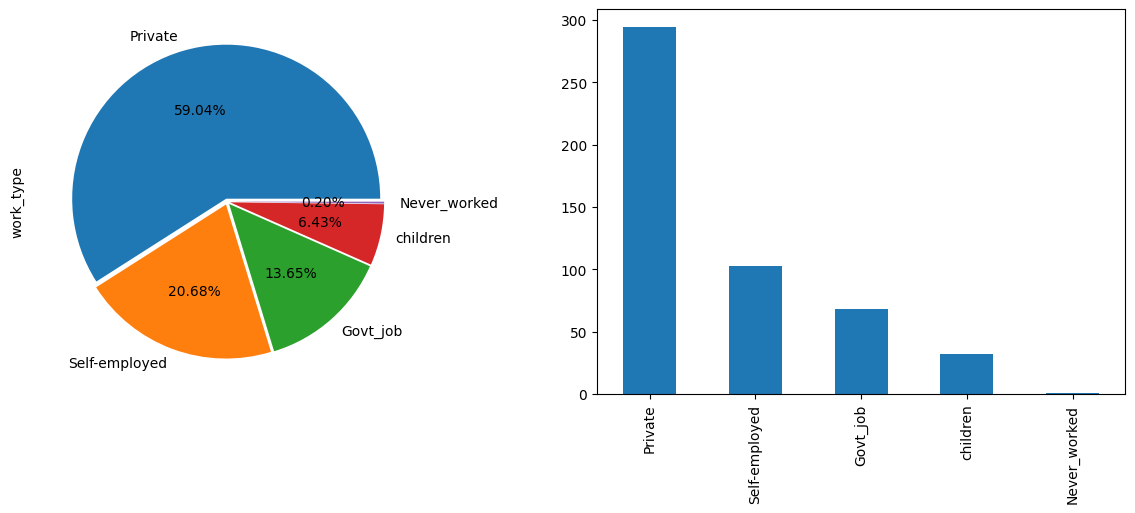

In [31]:
#Visualize the above using pie chart
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
new_df.work_type.value_counts().plot(kind="pie", explode=[0.02, 0.02, 0.02, 0.02, 0.02], autopct="%.2f%%");

#Visualize the above using bar chart
plt.subplot(1, 2, 2);
new_df.work_type.value_counts().plot(kind="bar");

In [32]:
"""
Okay so lets check those who had stroke and does who
don't have stroke with their work type.
"""
pd.crosstab(new_df.work_type, new_df.stroke)

stroke,0,1
work_type,,
Govt_job,35,33
Never_worked,1,0
Private,145,149
Self-employed,38,65
children,30,2


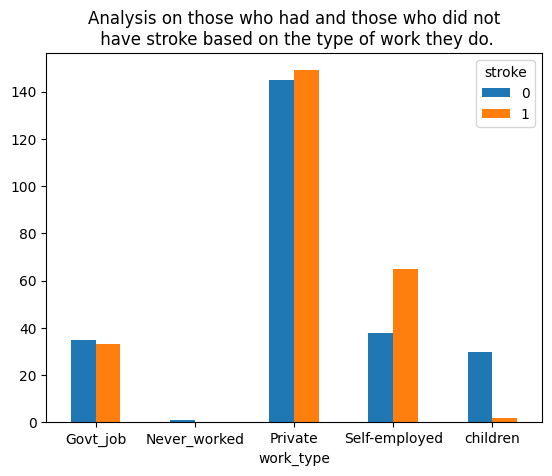

In [33]:
#Lets visualize the above
pd.crosstab(new_df.work_type, new_df.stroke).plot(kind="bar");
plt.title("Analysis on those who had and those who did not\n have stroke based on the type of work they do.")
plt.xticks(rotation=0);

In [34]:
"""
Okay so from above, we can see that many who had stroke are from the Private
Sectors. We are going to check the total number of those male and female under 
private sectors who had and did not have stroke.
"""
pd.crosstab([new_df.work_type, new_df.gender], new_df.stroke)

stroke                 0   1
work_type     gender        
Govt_job      Female  25  23
              Male    10  10
Never_worked  Female   1   0
Private       Female  88  76
              Male    57  73
Self-employed Female  19  40
              Male    19  25
children      Female  11   2
              Male    19   0

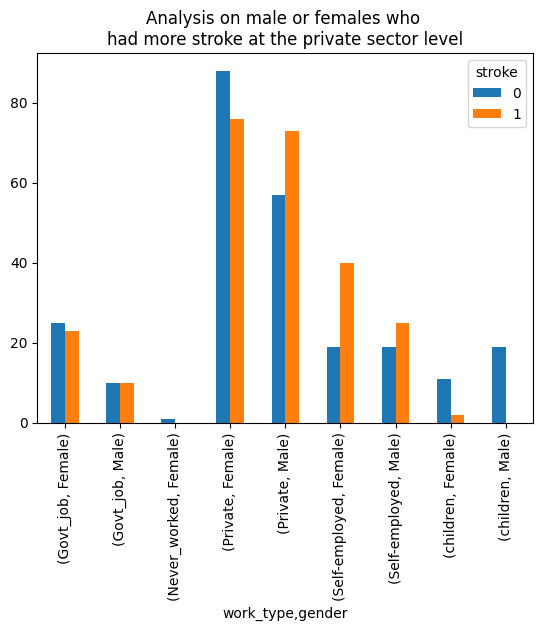

In [35]:
#Visualize above
pd.crosstab([new_df.work_type, new_df.gender], new_df.stroke).plot(kind="bar");
plt.title("Analysis on male or females who \nhad more stroke at the private sector level");

Okay so based on our analysis, we can see that those who had more strokes are from the private sectors. In the private sectors, those who had more stroke are also `Females`. Okay so we are still going to continue to explore our dataset by comparing other features as well. Let's continue.

## Comparing Smoking_status with stroke

In [36]:
#Display our dataset
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2244,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
1,26076,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2,31019,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
3,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4,68330,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0


In [37]:
#Check the value counts of smoking status
new_df.smoking_status.value_counts()

never smoked       181
formerly smoked    117
Unknown            115
smokes              85
Name: smoking_status, dtype: int64

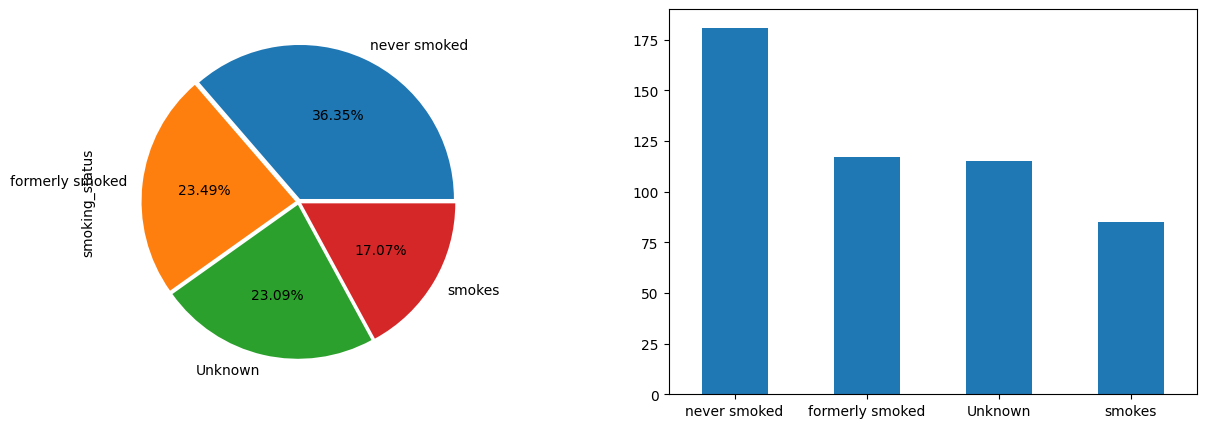

In [38]:
#Visualize smoking status
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
new_df.smoking_status.value_counts().plot(kind="pie", 
                                          autopct="%.2f%%", 
                                          explode=[0.02, 0.02, 0.02, 0.02]);

plt.subplot(1, 2, 2)
new_df.smoking_status.value_counts().plot(kind="bar");
plt.xticks(rotation=0);

In [39]:
"""
Alright so now lets try to see those who had stroke
based on smoking status of an individual.
"""
pd.crosstab(new_df.smoking_status, new_df.stroke)

stroke,0,1
smoking_status,,
Unknown,68,47
formerly smoked,47,70
never smoked,91,90
smokes,43,42


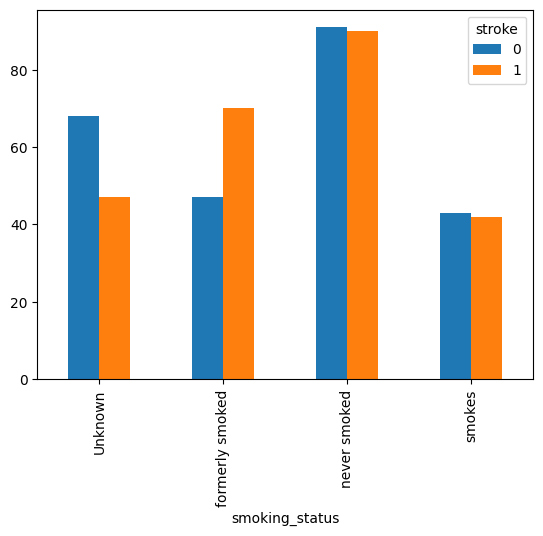

In [40]:
"""
Alright so now lets try to see those who had stroke
based on smoking status of an individual.
"""
pd.crosstab(new_df.smoking_status, new_df.stroke).plot(kind="bar");

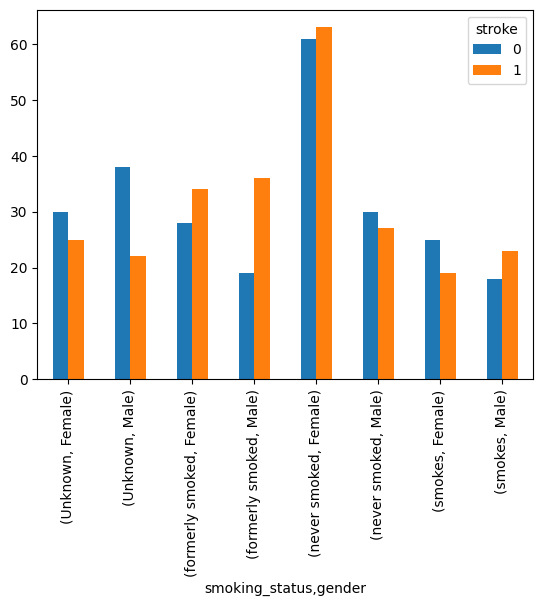

In [41]:
#Get total users who had stroke based on smoking status and gender
pd.crosstab([new_df.smoking_status, new_df.gender], 
            new_df.stroke).plot(kind="bar");

# Preprocessing
Okay so we are done exploring our dataset. Now we are going to preproccess our training and test test datasets. **Note:** preprocessing will be done saperatelly on both training and test datasets inother to avoid overfitting and underfitting. Okay so without wasting much time, let's continue.mBut before we do that lets split our dataset into training and test datasets.

In [42]:
#Display datasets
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2244,Male,44.0,0,0,Yes,Private,Urban,80.75,30.9,never smoked,0
1,26076,Female,75.0,1,0,Yes,Self-employed,Rural,219.82,29.5,formerly smoked,0
2,31019,Female,56.0,0,0,Yes,Private,Urban,94.19,25.7,never smoked,0
3,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
4,68330,Female,69.0,0,0,Yes,Self-employed,Rural,110.96,25.9,never smoked,0


In [43]:
# Make a copy of new_df datasets
drop_columns = new_df.copy()

#Drop some columns
drop_columns.drop(["id", "age", "ever_married","Residence_type","gender","work_type"],
                  axis=1, 
                  inplace=True)

#Display dataset after dropped
drop_columns = drop_columns.sample(drop_columns.shape[0])

#Display results
drop_columns.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
463,0,0,95.84,21.5,never smoked,1
425,0,0,64.44,45.0,never smoked,1
423,0,0,60.67,NaN,formerly smoked,1
153,0,0,184.15,NaN,Unknown,0
242,0,0,91.34,29.9,never smoked,0


In [44]:
#Split dataset on features (Y) and labels (x)
x = drop_columns.drop("stroke", axis=1)
y = drop_columns["stroke"]

In [45]:
#Display feature (x) datasets
x.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
463,0,0,95.84,21.5,never smoked
425,0,0,64.44,45.0,never smoked
423,0,0,60.67,NaN,formerly smoked
153,0,0,184.15,NaN,Unknown
242,0,0,91.34,29.9,never smoked


In [46]:
#Display label (y) dataset
y.head()

463    1
425    1
423    1
153    0
242    0
Name: stroke, dtype: int64

In [47]:
# Deal with null values in our datasets
x.isna().sum()

hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  50
smoking_status        0
dtype: int64

In [48]:
#Check bmi dtype
x.bmi.dtype

dtype('float64')

In [49]:
#Saperate categoricat and numeric features
cat_feature = x.select_dtypes(include=["category", "object"]).columns
num_feature = x.select_dtypes(exclude=["category", "object"]).columns

In [50]:
#Display category feature
cat_feature

Index(['smoking_status'], dtype='object')

In [51]:
#Get numeric features
num_feature

Index(['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [52]:
#Split our dataset into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   random_state=42,
                                                   test_size=0.2);

# Display x_train and x_test shape
print(f"x_train shape is: {x_train.shape}")
print(f"x_test shape is: {x_test.shape}")

x_train shape is: (398, 5)
x_test shape is: (100, 5)


In [53]:
#Display y_train and y_test shape
print(f"y_train shape is: {y_train.shape}")
print(f"y_test shape is: {y_test.shape}")

y_train shape is: (398,)
y_test shape is: (100,)


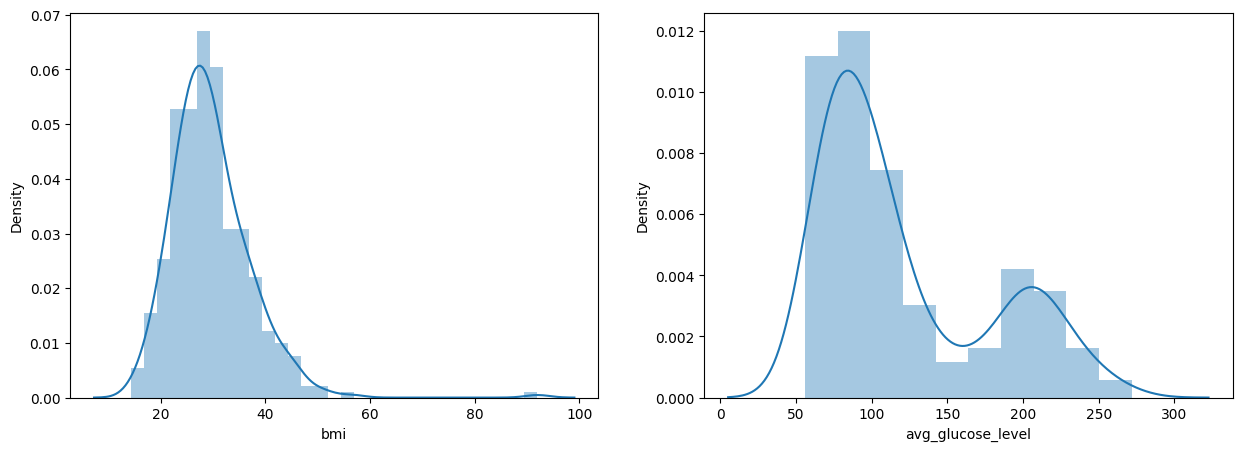

In [54]:
#Check distribution of bmi
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.distplot(x_train.bmi)

#Check distribution of avg_glucose_level
plt.subplot(1, 2, 2)
sns.distplot(x_train.avg_glucose_level)
plt.show();

Okay so from above, we can see that `bmi` and `avg_glucose_level` are not normally distributed. Hence we cannot use mean to replace the `Nan` values in `bmi` feature. We will be creating a function to help us preprocess our dataset and return it in a dataframe format for us to use to build our models. OKay so without wasting much time let's continue by creating the preprocessing function.

In [55]:
#Display datasets
x_train.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
129,0,0,83.16,20.2,Unknown
257,0,0,76.15,NaN,Unknown
9,1,1,221.24,24.2,Unknown
389,0,1,103.68,25.0,never smoked
39,1,0,263.56,26.3,never smoked


In [56]:
# Create a function that takes in both scalling libry, traing and test dataset preprocess it
# and return the final output.

def preprocess_dataset(scaler, xtrain_data, ytrain_data, xtest_data):
    
    """
    This function will process both numeric and categorical
    Dataset and return the processed datasets.
    Args:
        * scaler: The scalling libry to use.
        * xtrain_data: The x_train dataset to process
        * ytrain_data: The y_train dataset to used along side the x_train dataset
        * xtest_data: The test dataset
    """
    
    #Pipeline to preprocess numeric datasets
    num_pp = Pipeline([
        ("Step1_Replace_Nan_Values", SimpleImputer(strategy="median")),
        ("Step2_Scale_Numeric_Data", scaler())
    ])
    
    #Pipeline to preprocess categorical datasets
    cat_pp = Pipeline([
        ("Step1_OneHotEncode_Category_Data", OneHotEncoder(sparse=False, 
                                                           handle_unknown="ignore"))
    ])
    
    # Define column transformer to call and execute category and numeric pipelines
    col = ColumnTransformer([
        ("Step1:_Call_Category_Pipeline", cat_pp, cat_feature),
        ("Step2:_Call_Numeric_Pipeline", num_pp, ['avg_glucose_level', 'bmi'])
    ], remainder="passthrough")

    #Fit and transform on train dataset
    xxtrain = col.fit_transform(xtrain_data, ytrain_data)

    #Transform on test dataset
    xxtest = col.transform(x_test)

    #Get List Of Columns to convert dataset into a dataframe
    new_cat_features = col.named_transformers_['Step1:_Call_Category_Pipeline'][0].get_feature_names()

    #Convert xtrain_data dataset into a dataframe
    xtrain = pd.DataFrame(xxtrain, columns=['x0_Unknown', 
                                            'x0_formerly smoked',
                                            'x0_never smoked',
                                            'x0_smokes', 
                                            'avg_glucose_level',
                                            'hypertension', 
                                            'heart_disease',
                                            'bmi'])
    
    #Convert xtest dataset into a dataframe
    xtest = pd.DataFrame(xxtest, columns=['x0_Unknown', 
                                            'x0_formerly smoked',
                                            'x0_never smoked',
                                            'x0_smokes', 
                                            'avg_glucose_level',
                                            'hypertension', 
                                            'heart_disease',
                                            'bmi'])
    return xtest, xtrain

In [57]:
#Call function to preprocess dataset
xtest_0, xtrain_0 = preprocess_dataset(scaler=StandardScaler,
                                      xtrain_data=x_train,
                                      xtest_data=x_test,
                                      ytrain_data=y_train)

In [58]:
#Display train dataset
xtrain_0.head()

,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,avg_glucose_level,hypertension,heart_disease,bmi
0,1.0,0.0,0.0,0.0,-0.676765,-1.270142,0.0,0.0
1,1.0,0.0,0.0,0.0,-0.802023,-0.147958,0.0,0.0
2,1.0,0.0,0.0,0.0,1.790520,-0.722735,1.0,1.0
3,0.0,0.0,1.0,0.0,-0.310103,-0.613254,0.0,1.0
4,0.0,0.0,1.0,0.0,2.546715,-0.435347,1.0,0.0


In [59]:
#Display test dataset
xtest_0.head()

,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,avg_glucose_level,hypertension,heart_disease,bmi
0,0.0,1.0,0.0,0.0,-1.102215,0.385764,0.0,1.0
1,0.0,0.0,1.0,0.0,0.290100,-1.393308,0.0,0.0
2,1.0,0.0,0.0,0.0,-0.651213,-0.818531,0.0,0.0
3,0.0,0.0,1.0,0.0,1.893085,0.043634,0.0,1.0
4,0.0,0.0,1.0,0.0,2.054974,-0.134273,0.0,0.0


In [136]:
#Check dataset shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(398, 5) (398,)
(100, 5) (100,)


In [153]:
#Display y train dataset
y_train.to_csv("../datasets/ytrain_data.csv", index=False)
y_test.to_csv("../datasets/ytest_data.csv",  index=False)

In [154]:
#Export preproccessed train and test datasets
xtest_0.to_csv("../datasets/xtest_data.csv", index=False)
xtrain_0.to_csv("../datasets/xtrain_data.csv", index=False)

In [152]:
pd.read_csv("../datasets/ytest_data.csv")

,Unnamed: 0,stroke
0,336,1
1,68,0
2,214,0
3,339,1
4,69,0
...,...,...
95,109,0
96,337,1
97,116,0
98,146,0


In [150]:
#Check dtype
pd.read_csv("../datasets/ytest_data.csv").dtypes

stroke    int64
dtype: object

# Build Models
Okay so now we have successfully been able to preprocess our dataset. Now, we are going to start buillding our models. We will create a function, which will take in list of algorithms to be used to build our model along with our training and test data for building and evaluating our model. After building and making prediction, we will select the best three models which performed wll based on their  `accuracy_score`, `precision_score`, `recal_score` and `f1_score`. Okay lets get started now.

In [61]:
# Create a function to build and evaluate models using default parameters
def build_and_evaluate_models(algorithms, xtrain_data, ytrain_data, xtest_data, ytest_data):
    
    """
    A function to take in a list of Machine Learning Algorithms,
    Build a model out of it, evaluate it and return the evaluated results.
    Args:
        * algorithms: List of all algorithms to be used in training the models.
        * xtrain_data: The training dataset to be used during model building.
        * ytrain_data: The training dataset used along side the x_train dataset during model training.
        * xtest_data: The test dataset used in model prediction.
        * ytest_data: The y_test dataset used along side the  predicted values for evaluating our model
    """
    
    #Define List of variables to return
    predicted_values = {}
    precision = {}
    accuracy = {}
    recal = {}
    f1 = {}
    
    # Loop through algorithms to build model
    for names, alg in algorithms.items():
                
        #Fit on train dataset
        alg.fit(xtrain_data, ytrain_data)
        
        #Make prediction on test dataset
        ypred = alg.predict(xtest_data)
        
        """
        Okay so now our model has successfully been built. Now we are going to
        Evaluate our model using different evaluation algorithms from scikit learn.
        """
        #Get predicted values
        predicted_values[names] = ypred

        # Get precision score
        precision[names] = round(precision_score(ytest_data, ypred), 3)
        
        #Get accuracy score
        accuracy[names] = round(accuracy_score(ytest_data, ypred),3)
        
        #Get recal score
        recal[names] = round(recall_score(ytest_data, ypred),3)
        
        #Get f1 score
        f1[names] = round(f1_score(ytest_data, ypred),3)
                
    #Return results
    return predicted_values, precision, accuracy, recal, f1

## Model_0

In [62]:
#Set random seed
np.random.seed(42)

#Call function to build our model and return results
predicted_0, precision_0, accuracy_0, recal_0, f1_0 = build_and_evaluate_models(algorithms=algorithms,
                                                                                xtrain_data=xtrain_0,
                                                                                xtest_data=xtest_0,
                                                                                ytrain_data=y_train,
                                                                                ytest_data=y_test)

In [63]:
#Display predicted values
predicted_0

{'LinearDiscriminantAnalysis': array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]),
 'GradientBoostingClassifier': array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1]),
 'DecisionTreeClassifier': array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        

In [64]:
#Display precision score
precision_0

{'LinearDiscriminantAnalysis': 0.595,
 'GradientBoostingClassifier': 0.625,
 'DecisionTreeClassifier': 0.62,
 'RandomForestClassifier': 0.694,
 'KNeighborsClassifier': 0.614,
 'ExtraTreesClassifier': 0.68,
 'AdaBoostClassifier': 0.6,
 'LogisticRegression': 0.595,
 'MLPClassifier': 0.553,
 'GaussianNB': 0.625,
 'SVC': 0.611}

In [65]:
#Display accuracy score
accuracy_0

{'LinearDiscriminantAnalysis': 0.56,
 'GradientBoostingClassifier': 0.61,
 'DecisionTreeClassifier': 0.61,
 'RandomForestClassifier': 0.68,
 'KNeighborsClassifier': 0.59,
 'ExtraTreesClassifier': 0.67,
 'AdaBoostClassifier': 0.57,
 'LogisticRegression': 0.56,
 'MLPClassifier': 0.53,
 'GaussianNB': 0.57,
 'SVC': 0.57}

In [66]:
#Display f1 score
f1_0

{'LinearDiscriminantAnalysis': 0.5,
 'GradientBoostingClassifier': 0.606,
 'DecisionTreeClassifier': 0.614,
 'RandomForestClassifier': 0.68,
 'KNeighborsClassifier': 0.568,
 'ExtraTreesClassifier': 0.673,
 'AdaBoostClassifier': 0.527,
 'LogisticRegression': 0.5,
 'MLPClassifier': 0.472,
 'GaussianNB': 0.482,
 'SVC': 0.506}

In [67]:
#Display recall score
recal_0

{'LinearDiscriminantAnalysis': 0.431,
 'GradientBoostingClassifier': 0.588,
 'DecisionTreeClassifier': 0.608,
 'RandomForestClassifier': 0.667,
 'KNeighborsClassifier': 0.529,
 'ExtraTreesClassifier': 0.667,
 'AdaBoostClassifier': 0.471,
 'LogisticRegression': 0.431,
 'MLPClassifier': 0.412,
 'GaussianNB': 0.392,
 'SVC': 0.431}

In [68]:
#Okay so now, lets create a function which recieves list of algorithms,
#Evaluate it using confusion metrics and return the respons back to us

def evaluate_model_using_confusion_matrics(predicted_results, y_test_data):

    for alg_name, ypred in predicted_results.items():
        plt.figure(figsize=(3,2))
        sns.heatmap(confusion_matrix(y_test_data, ypred),annot=True,fmt="g")
        plt.ylabel("Predicted Label")
        plt.xlabel("Actual Label")
        plt.title(alg_name)
        plt.figure()
        plt.show()



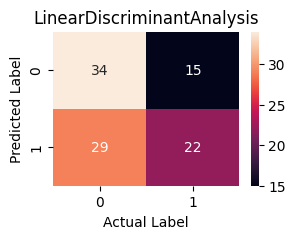

<Figure size 640x480 with 0 Axes>

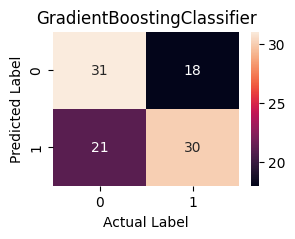

<Figure size 640x480 with 0 Axes>

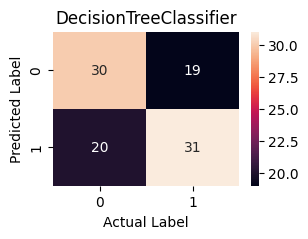

<Figure size 640x480 with 0 Axes>

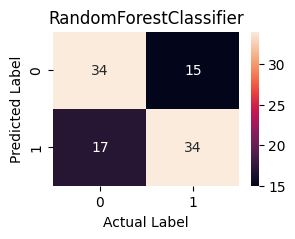

<Figure size 640x480 with 0 Axes>

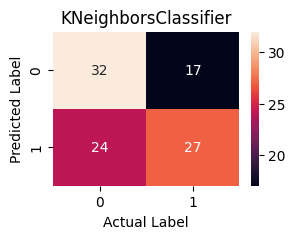

<Figure size 640x480 with 0 Axes>

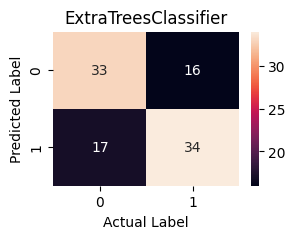

<Figure size 640x480 with 0 Axes>

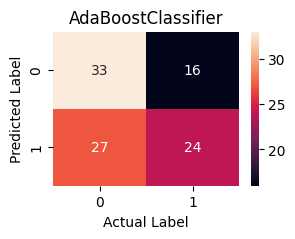

<Figure size 640x480 with 0 Axes>

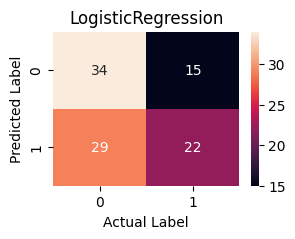

<Figure size 640x480 with 0 Axes>

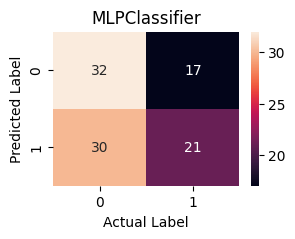

<Figure size 640x480 with 0 Axes>

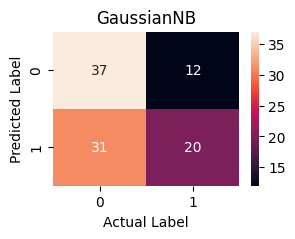

<Figure size 640x480 with 0 Axes>

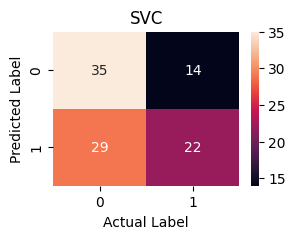

<Figure size 640x480 with 0 Axes>

In [69]:

evaluate_model_using_confusion_matrics(predicted_results=predicted_0,
                                       y_test_data=y_test)

In [70]:
#Compine accuracy score, precision, recal anf f1 score into a dataframe
df = pd.concat([pd.DataFrame(accuracy_0, index=["accuracy score"]), 
                pd.DataFrame(precision_0, index=["precision score"]),
                pd.DataFrame(recal_0, index=["recal score"]),
                pd.DataFrame(f1_0, index=["f1 score"])])

In [71]:
#Display results
df_0 = df.T

Text(0.5, 1.0, 'fig 7.8 comparing models')

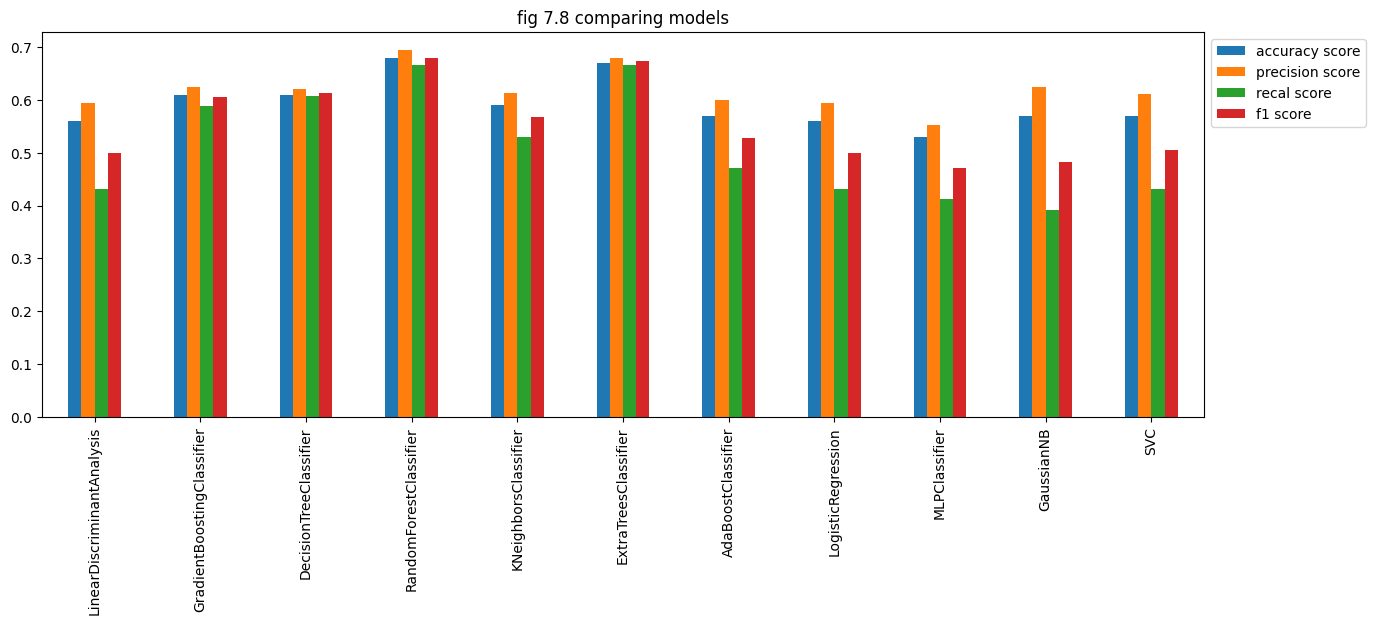

In [72]:
#Okay so now lets visualize our results
df_0.plot(kind="bar", figsize=(15, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.title("fig 7.8 comparing models")

#### Observation
Okay so from above graph (fig 7.8) we can see that the model which is performing very well is `RandomForestClassifier` but when we used `confusion metrics` with the help of seaborn to visualize our results, we could see that `ExtraTreeClassifier` precision, recall and f1 score is more higher than the model built using `RandomForestClassifier`. We are going to select  the first best three(3) algorithms that performed well than others. Selected Algorithms to perform hyper-parameter tunning on are are follows:

* **ExtraTreeClassifier**
* **RandomForestClassifier**
* **GradientBoostingClassifier**

Okay so without wasting much time, lets continue by performing hyper parameter tunning.

#### Hyper Parameter Tuning
We are going to perforning hyper-parameter tuning with the help of GridSearchCV, RandomSearchCV and Scikitlearn Pipelines.

In [73]:
#Okay so let's define our pipeline
p = Pipeline([
  ("random_forest_classifier", RandomForestClassifier())
])

#Define param grids
param_grid = [
  {
    "random_forest_classifier": [RandomForestClassifier()],
    "random_forest_classifier__n_estimators": [100, 200, 300, 600, 50],
    "random_forest_classifier__criterion": ["gini", "entropy"],
    "random_forest_classifier__max_depth": [None, 100, 20, 50, 10],
    "random_forest_classifier__min_samples_split": [2, 10, 50, 100, 150],
  },
  {
    "random_forest_classifier": [ExtraTreesClassifier()],
    "random_forest_classifier__n_estimators": [500]
  },
  {
    "random_forest_classifier": [GradientBoostingClassifier()],
    "random_forest_classifier__n_estimators": [400, 600, 800],
    "random_forest_classifier__criterion": ["friedman_mse", "squared_error", "mse"],
    "random_forest_classifier__max_features": ["sqrt", "log2", None],
    "random_forest_classifier__min_samples_split": [17, 30, 50, 70, 100]
  }
]


## RandomizedSearchCV

In [74]:
#set random seed
np.random.seed(42)

#Initialize RandomizedSearchCV
cls_random = RandomizedSearchCV(estimator=p, 
                                param_distributions=param_grid, 
                                n_jobs=-1)

#Fit on train dataset(actual dataset first)
cls_random.fit(xtrain_0, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('random_forest_classifier',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions=[{'random_forest_classifier': [RandomForestClassifier(max_depth=50,
                                                                                             min_samples_split=100)],
                                         'random_forest_classifier__criterion': ['gini',
                                                                                 'entropy'],
                                         'random_forest_classifier__max_depth': [None,
                                                                                 100,
                                                                                 20,
                                                                                 50,
                                                                                 10],
                                         'random_forest...
                                         'random_forest_classifier__n_estimators': [500]},
                                        {'random_forest_classifier': [GradientBoostingClassifier()],
                                         'random_forest_classifier__criterion': ['friedman_mse',
                                                                                 'squared_error',
                                                                                 'mse'],
                                         'random_forest_classifier__max_features': ['sqrt',
                                                                                    'log2',
                                                                                    None],
                                         'random_forest_classifier__min_samples_split': [17,
                                                                                         30,
                                                                                         50,
                                                                                         70,
                                                                                         100],
                                         'random_forest_classifier__n_estimators': [400,
                                                                                    600,
                                                                                    800]}])

In [75]:
#Get best parameters
cls_random.best_estimator_

Pipeline(steps=[('random_forest_classifier',
                 RandomForestClassifier(max_depth=50, min_samples_split=100))])

In [76]:
#Get best parameters
cls_random.best_params_

{'random_forest_classifier__n_estimators': 100,
 'random_forest_classifier__min_samples_split': 100,
 'random_forest_classifier__max_depth': 50,
 'random_forest_classifier__criterion': 'gini',
 'random_forest_classifier': RandomForestClassifier(max_depth=50, min_samples_split=100)}

Okay so now we can see that our hypa-parameter tuning using `RandomizedSearchCV` returned `RandomForestClassifier` as the best estimator and also provided us with best parameters used. So, we are going to build another model using the estimator but with the provided hypa-parameter tuning. Okay so lets continue.

In [77]:
#Define estimator and pass in parameters
estimator = {"RandomForestClassifier": RandomForestClassifier(n_estimators=600,
                                                             min_samples_split=10,
                                                             max_depth=100,
                                                             criterion="gini")
}


#Call function to buils and evaluate our model
predicted_1, precision_1, accuracy_1, recal_1, f1_1 = build_and_evaluate_models(estimator, 
                                                                                xtrain_0, 
                                                                                y_train, 
                                                                                xtest_0,
                                                                                y_test)

In [78]:
#Display predicted values
predicted_1

{'RandomForestClassifier': array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1])}

In [79]:
#Display precision score
precision_1

{'RandomForestClassifier': 0.648}

In [80]:
#Display accutracy
accuracy_0

{'LinearDiscriminantAnalysis': 0.56,
 'GradientBoostingClassifier': 0.61,
 'DecisionTreeClassifier': 0.61,
 'RandomForestClassifier': 0.68,
 'KNeighborsClassifier': 0.59,
 'ExtraTreesClassifier': 0.67,
 'AdaBoostClassifier': 0.57,
 'LogisticRegression': 0.56,
 'MLPClassifier': 0.53,
 'GaussianNB': 0.57,
 'SVC': 0.57}

In [81]:
#Display recall
recal_1

{'RandomForestClassifier': 0.686}

In [82]:
#Display f1
f1_1

{'RandomForestClassifier': 0.667}

In [83]:
#Display classification report
print(classification_report(y_test, predicted_1["RandomForestClassifier"]))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63        49
           1       0.65      0.69      0.67        51

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



In [84]:
# Display Previous models built using RandomForestClassifier
print(classification_report(y_test, predicted_0["RandomForestClassifier"]))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        49
           1       0.69      0.67      0.68        51

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



#### Observation
Okay so by comparing both previous model and the one we just built, we can see a little difference in them. Our hype-parameter model is performing a little better than the previous one. Okay so we are going to continue to build more different models. This time we are going to introduce deep learning techniques. Here, we will be using`Tensorflow` to build different models by performing diferent experiment. Okay so lets get started.

In [85]:
#Check tensorflow version
tf.__version__

'2.9.1'

In [86]:
#Check total number of columns in our datasets
xtest_0.shape, xtrain_0.shape

((100, 8), (398, 8))

Build 3rd model using minimum layers with functional api


In [87]:
#Set random seed
tf.random.set_seed(42)

#Define input number
INPUT_SHAPE = 8

#Define input layer
input = tf.keras.Input(shape=INPUT_SHAPE)

#Define fully connected layers
x = tf.keras.layers.Dense(units=5)(input)
x = tf.keras.layers.Dense(units=2)(x)
x = tf.keras.layers.Flatten()(x)

#Define output layer
output = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

#Build model
model = tf.keras.Model(input, output)

2022-09-01 12:44:30.505999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-01 12:44:30.506090: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-01 12:44:30.506121: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (debrah): /proc/driver/nvidia/version does not exist
2022-09-01 12:44:30.551066: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [88]:
#Compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [89]:
#Check models summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 5)                 45        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [90]:
#Set random seed
tf.random.set_seed(42)

#Fit on training datasets
history = model.fit(xtrain_0,
         y_train,
         validation_data=(xtest_0, y_test),
         epochs=50)

Epoch 1/50
13/13 [==============================] - 5s 36ms/step - loss: 0.6762 - accuracy: 0.5879 - val_loss: 0.6788 - val_accuracy: 0.6000
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6697 - accuracy: 0.6005 - val_loss: 0.6770 - val_accuracy: 0.6100
Epoch 3/50
13/13 [==============================] - 0s 9ms/step - loss: 0.6643 - accuracy: 0.6030 - val_loss: 0.6757 - val_accuracy: 0.6000
Epoch 4/50
13/13 [==============================] - 0s 14ms/step - loss: 0.6599 - accuracy: 0.5955 - val_loss: 0.6744 - val_accuracy: 0.5900
Epoch 5/50
13/13 [==============================] - 2s 166ms/step - loss: 0.6554 - accuracy: 0.6080 - val_loss: 0.6735 - val_accuracy: 0.5900
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6514 - accuracy: 0.6181 - val_loss: 0.6724 - val_accuracy: 0.5900
Epoch 7/50
13/13 [==============================] - 0s 12ms/step - loss: 0.6480 - accuracy: 0.6281 - val_loss: 0.6719 - val_accuracy: 0.5900
Epoch 8/50
13/1

In [91]:
#Evaluate model on test datasets
model.evaluate(xtest_0, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5600


[0.6720187664031982, 0.5600000023841858]

In [92]:

#A function to evaluate our loss and accuracy
def evaluate_model(history):
  
  """
  Were are going to create a function.
  This function will be used to visualize
  our loss and accuracy values from our
  history after a model has ben built
  """
  
  #get loss values from both val_loss and loss
  val_loss = history.history["val_loss"]
  loss = history.history["loss"]

  #get accuracy values from both accuracy and val accuracy
  val_accuracy = history.history["val_accuracy"]
  accuracy = history.history["accuracy"]

  #get our total number of epoch model trains on
  epoch = range(len(history.history["loss"]))

  """
  Now our values from both the loss
  and accuracy values have been placed into the
  appropraite variables. Now we will make some
  configurations on how our plots shold look like
  before we start plotting them.
  """
  plt.figure(figsize=(15, 5))
  
  #plot our loss values
  plt.subplot(1, 2, 1)
  plt.plot(epoch, loss, label="Loss")#plot loss value first
  plt.plot(epoch, val_loss, label="Val loss")#plot val loss value
  plt.legend()

  #plot our accuracy values
  plt.subplot(1, 2, 2)
  plt.plot(epoch, accuracy, label="accuracy")#plot accuracy value first
  plt.plot(epoch, val_accuracy, label="Val accuracy")#plot val_accuracy
  plt.legend()
  plt.show()

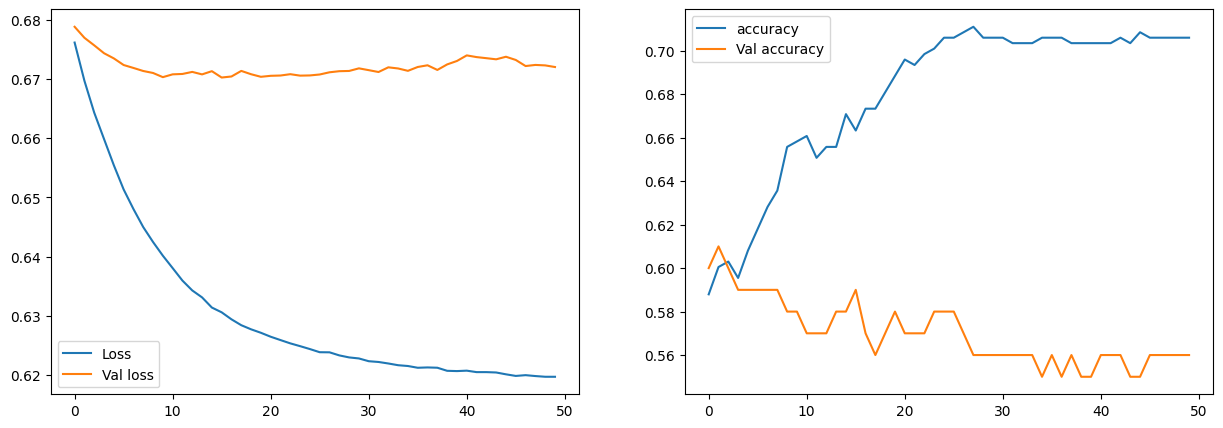

In [93]:
evaluate_model(history=history)

#### Observation
From above, we can see that with `Loss` and `Val Loss` both lines are almost in the same direction, but with accuraccy score, they are not. We can also see from the outputed logs that, when we fit on our training dataset is our models was performing very wll but suring testing time, our model was not performing. This means our model is overfiting. Okay so lets continue by buiding model models but this time, we will be adding more layers and try to reduce its unit.

#### Model 4


In [94]:
#Set random seed
tf.random.set_seed(42)

#Define input layer
input = tf.keras.Input(shape=INPUT_SHAPE)

#Define fully connected layers
x = tf.keras.layers.Dense(units=3, activation="relu")(input)
x = tf.keras.layers.Dense(units=2, activation="relu")(x)
x = tf.keras.layers.Dense(units=1, activation="relu")(x)

#Define flatten layer
x = tf.keras.layers.Flatten()(x)

#Define output layer
output = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

#Define model
model_1 = tf.keras.Model(input, output)

In [95]:
#Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="adam",
                metrics=["accuracy"])

In [96]:
#Check model layers
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params:

In [97]:
#sset random seed
tf.random.set_seed(42)

#Fit and train on training dataset
history_1 = model_1.fit(xtrain_0,
                        y_train,
                        validation_data=(xtest_0, y_test),
                        epochs=60)

Epoch 1/60
13/13 [==============================] - 1s 24ms/step - loss: 0.7240 - accuracy: 0.4950 - val_loss: 0.7214 - val_accuracy: 0.5100
Epoch 2/60
13/13 [==============================] - 0s 5ms/step - loss: 0.7173 - accuracy: 0.4975 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 3/60
13/13 [==============================] - 0s 5ms/step - loss: 0.7115 - accuracy: 0.5050 - val_loss: 0.7128 - val_accuracy: 0.5000
Epoch 4/60
13/13 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.4975 - val_loss: 0.7089 - val_accuracy: 0.4900
Epoch 5/60
13/13 [==============================] - 0s 5ms/step - loss: 0.7025 - accuracy: 0.4899 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 6/60
13/13 [==============================] - 0s 6ms/step - loss: 0.6983 - accuracy: 0.5025 - val_loss: 0.7022 - val_accuracy: 0.5300
Epoch 7/60
13/13 [==============================] - 0s 11ms/step - loss: 0.6946 - accuracy: 0.5075 - val_loss: 0.6993 - val_accuracy: 0.5500
Epoch 8/60
13/13 [

In [98]:
#Evaluate model
model_1.evaluate(xtest_0, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5700


[0.6735482811927795, 0.5699999928474426]

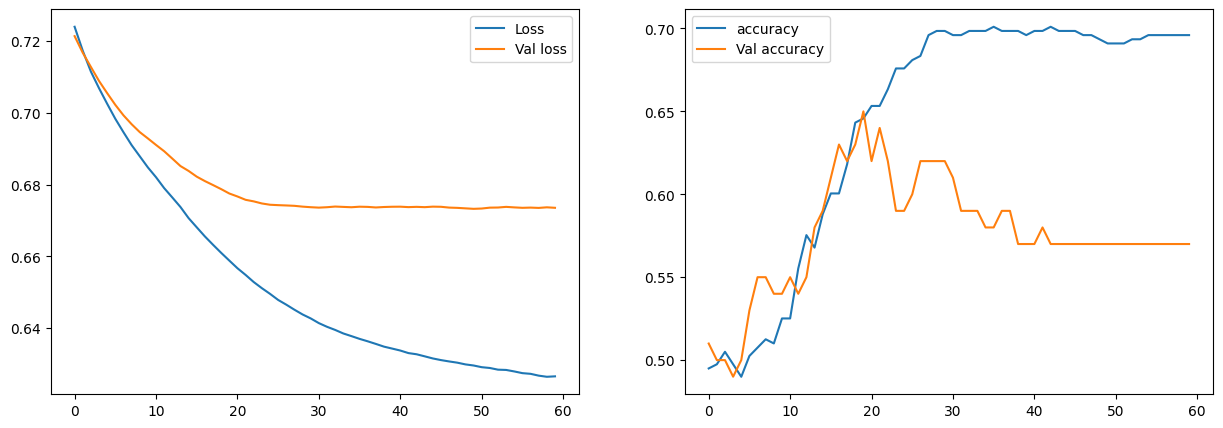

In [99]:
#Evaluate model using history
evaluate_model(history_1)

#### Observation
Okay so from above, we can see that the results of this model looks very similar to the previous model. We are going to build one final model to see if this time we will get a better score. With this, we are going to add more layers and change optimizer from adams to SGD. Let's get started.

In [100]:
#Set random seed
tf.random.set_seed(42)

#Set input layer
input = tf.keras.Input(shape=(INPUT_SHAPE))

#Define layers
x = tf.keras.layers.Dense(units=10, activation="relu")(input)
x = tf.keras.layers.Dense(units=8, activation="relu")(x)
x = tf.keras.layers.Dense(units=6, activation="relu")(x)
x = tf.keras.layers.Dense(units=5, activation="relu")(x)
x = tf.keras.layers.Dense(units=3, activation="relu")(x)

#Define output layer
output = tf.keras.layers.Dense(units=1, activation="softmax")(x)

#Define model
model_2 = tf.keras.Model(input, output)


In [101]:
#Check models summary
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_7 (Dense)             (None, 10)                90        
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 5)                 35        
                                                                 
 dense_11 (Dense)            (None, 3)                 18        
                                                                 
 dense_12 (Dense)            (None, 1)                 4   

In [102]:
#Set random seed
tf.random.set_seed(42)

#Compile our model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

In [103]:
#Set random seed
tf.random.set_seed(42)

#Fit on training dataset
history_2 = model_2.fit(xtrain_0,
                     y_train,
                     validation_data=(xtest_0, y_test),
                     epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 28ms/step - loss: 0.6891 - accuracy: 0.4975 - val_loss: 0.6948 - val_accuracy: 0.5100
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.4975 - val_loss: 0.6946 - val_accuracy: 0.5100
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.4975 - val_loss: 0.6945 - val_accuracy: 0.5100
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.6879 - accuracy: 0.4975 - val_loss: 0.6945 - val_accuracy: 0.5100
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6876 - accuracy: 0.4975 - val_loss: 0.6944 - val_accuracy: 0.5100
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6873 - accuracy: 0.4975 - val_loss: 0.6944 - val_accuracy: 0.5100
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.6871 - accuracy: 0.4975 - val_loss: 0.6943 - val_accuracy: 0.5100
Epoch 8/10

In [104]:
#Evaluate model
model_2.evaluate(xtest_0, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.5100


[0.7035604119300842, 0.5099999904632568]

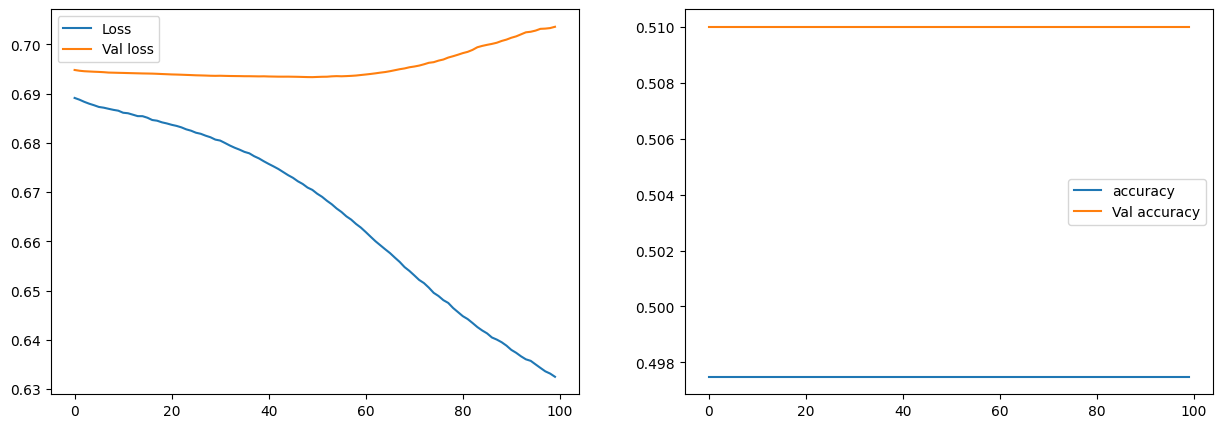

In [105]:
#Evaluate model using custom function
evaluate_model(history=history_2)

#### Observation
Okay so from above, we can see that our model this time around is not overfitting but our loss values is higher than our accuracy score. Okay so we will stop building our model here and select one from the three we buil so far. Lets try to display them here are see the one we can select from. Remeber that our base model is not part. We will start with the one we built by tuning the `RandomForestClassifier` and compare it with the once we built using tensorflow. Okay let's get started now.

In [106]:
#Display RandomForestClassifier model built using hypaparameter tuning
recal_1, f1_1, precision_1

({'RandomForestClassifier': 0.686},
 {'RandomForestClassifier': 0.667},
 {'RandomForestClassifier': 0.648})

In [107]:
#Display model model_0
model.evaluate(xtest_0, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.5600


[0.6720187664031982, 0.5600000023841858]

In [108]:
#Display model model_1
model_1.evaluate(xtest_0, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5700


[0.6735482811927795, 0.5699999928474426]

In [109]:
#Display model model_2
model_2.evaluate(xtest_0, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.7036 - accuracy: 0.5100


[0.7035604119300842, 0.5099999904632568]

Okay so from above, we can see that our second model is perfoming well than other models, hence, we are going to deploy the second model into production by containerizing it and deploy onto `Microsoft Azure`. But before we do that, lets first save our model using `pickle` import it, test it and then move onto deploying of our model.

In [110]:
#Set random seed
tf.random.set_seed(42)

#Okay so lets re-create our model using our custom patameters
cls_r =RandomForestClassifier(n_estimators=600,min_samples_split=10,max_depth=100,criterion="gini")
cls_r.fit(xtrain_0, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=10, n_estimators=600)

In [111]:
#Make prediction to confirm if it matched the previsios one
print(classification_report(cls_r.predict(xtest_0), y_test))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61        46
           1       0.67      0.63      0.65        54

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



In [112]:
#Display previous RandomForestClassifier
recal_1, f1_1, precision_1

({'RandomForestClassifier': 0.686},
 {'RandomForestClassifier': 0.667},
 {'RandomForestClassifier': 0.648})

In [113]:
#Okay so lets save our model now
pickle.dump(cls_r, open("model.pkl","wb"))

In [114]:
#Import and test model
saved_model = pickle.load(open("model.pkl","rb"))

In [115]:
#Display test dataset
xtest_0

,x0_Unknown,x0_formerly smoked,x0_never smoked,x0_smokes,avg_glucose_level,hypertension,heart_disease,bmi
0,0.0,1.0,0.0,0.0,-1.102215,0.385764,0.0,1.0
1,0.0,0.0,1.0,0.0,0.290100,-1.393308,0.0,0.0
2,1.0,0.0,0.0,0.0,-0.651213,-0.818531,0.0,0.0
3,0.0,0.0,1.0,0.0,1.893085,0.043634,0.0,1.0
4,0.0,0.0,1.0,0.0,2.054974,-0.134273,0.0,0.0
...,...,...,...,...,...,...,...,...
95,0.0,1.0,0.0,0.0,-1.079700,0.851059,0.0,0.0
96,0.0,1.0,0.0,0.0,-0.609222,1.590058,0.0,0.0
97,1.0,0.0,0.0,0.0,-0.471992,0.673152,0.0,1.0
98,0.0,0.0,1.0,0.0,-0.679803,0.153116,0.0,0.0


In [116]:
y_test

336    1
68     0
214    0
339    1
69     0
      ..
109    0
337    1
116    0
146    0
361    1
Name: stroke, Length: 100, dtype: int64

In [117]:
#Make prediction on first row
saved_model.predict([[0.0, 1.0,0.0,0.0,-0.485824,2.700309,-1.102215,0.385764]])

array([0])

In [118]:
#Make prediction on third row
saved_model.predict([[1.0, 0.0,	0.0,0.0,-0.485824,-0.370328,-0.651213,-0.818531]])

array([1])